# Домашнее задание 2

## Разведка

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 30.8+ KB


## Дополнение к EDA с анализом мультиклассовых перменных
Проверим связи между продолжительностью сна и уровнем стресса

In [30]:
# для начала бинаризируем продолжительность сна
df['Sleep_Duration_level'] = df['Sleep Duration'].apply(
    lambda x: 'high' if x > df['Sleep Duration'].median() else 'low'
)
df['Sleep_Duration_level']

0       low
1       low
2       low
3       low
4       low
       ... 
369    high
370    high
371    high
372    high
373    high
Name: Sleep_Duration_level, Length: 374, dtype: object

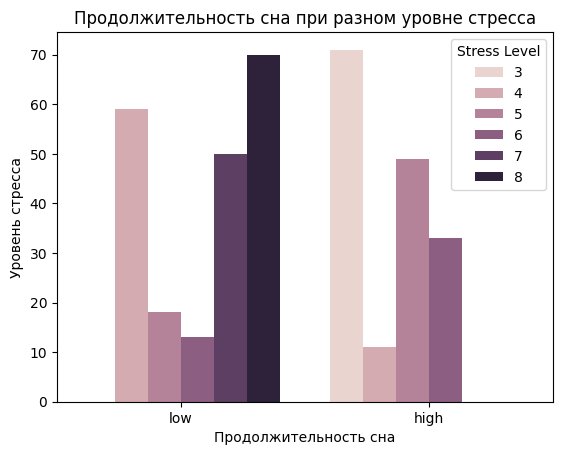

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# визуализируем различия
sns.countplot(data=df, x='Sleep_Duration_level', hue='Stress Level')
plt.title('Продолжительность сна при разном уровне стресса')
plt.xlabel('Продолжительность сна')
plt.ylabel('Уровень стресса')
plt.show()

Видно, что при низкой продолжительности сна уровень стресса достигает максимальных отметок.

А при высокой продолжительности сна, стресса практически нет.

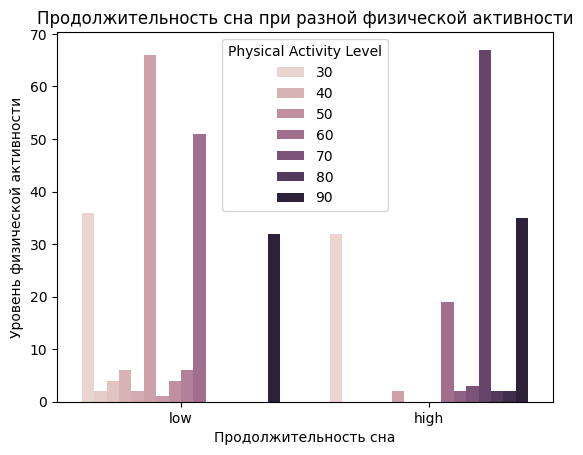

In [32]:
sns.countplot(data=df, x='Sleep_Duration_level', hue='Physical Activity Level')
plt.title('Продолжительность сна при разной физической активности')
plt.xlabel('Продолжительность сна')
plt.ylabel('Уровень физической активности')
plt.show()

Меньше всего спят люди, у коготых низкий уровень физической активности.

Люди же, с активным образом жизни лучше спят.

In [33]:
table = pd.crosstab(df['Sleep_Duration_level'], df['Stress Level'])
table

Stress Level,3,4,5,6,7,8
Sleep_Duration_level,,,,,,
high,71,11,49,33,0,0
low,0,59,18,13,50,70


Баланс классов у нас не равномерен. В low 210, в high 164.

Проанализируем зависимость двух категориальных переменных численным методом.

χ² (хи-квадрат) — проверка наличия зависимости.

p < 0.05 → зависимость есть (значимая)

p ≥ 0.05 → зависимость не доказана

In [34]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

χ² = 245.00
p-value = 6.492615106897987e-51


p-value = 5.57e-29 - это 0.0000000000000000000000000000557 

Это очень мало, ну и соответственно по интерпритации p гораздо меньше 0.05, и есть неплохая такая зависимость.

## Нормализация числовых признаков

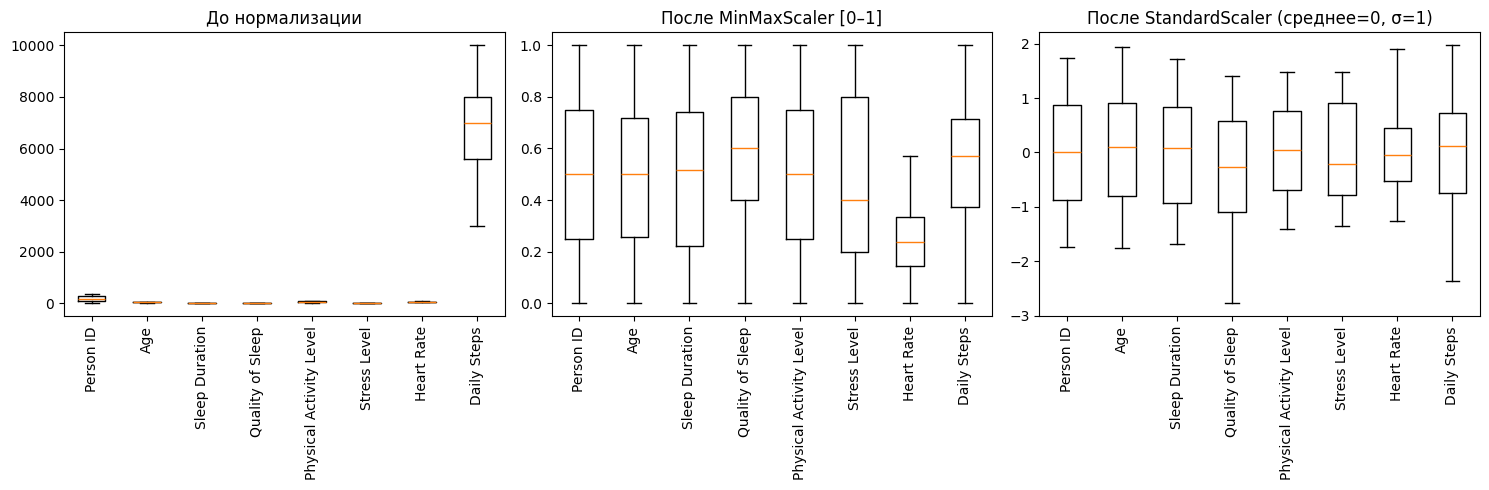

In [35]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Берем все числовые признаки
num_df = df.select_dtypes(include=[int, float]).copy()

# --- Применяем два метода нормализации ---
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(num_df), columns=num_df.columns)
std_scaled = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)

# --- Визуализация ---
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].boxplot(num_df.values, showfliers=False)
axes[0].set_title("До нормализации")
axes[0].set_xticks(range(1, len(num_df.columns)+1))
axes[0].set_xticklabels(num_df.columns, rotation=90)

axes[1].boxplot(minmax_scaled.values, showfliers=False)
axes[1].set_title("После MinMaxScaler [0–1]")
axes[1].set_xticks(range(1, len(num_df.columns)+1))
axes[1].set_xticklabels(num_df.columns, rotation=90)

axes[2].boxplot(std_scaled.values, showfliers=False)
axes[2].set_title("После StandardScaler (среднее=0, σ=1)")
axes[2].set_xticks(range(1, len(num_df.columns)+1))
axes[2].set_xticklabels(num_df.columns, rotation=90)

plt.tight_layout()
plt.show()


## Задача классификации

In [49]:
df['Stress Level'] = df['Stress Level'].astype('category')
df['Physical Activity Level'] = df['Physical Activity Level'].astype('category')

y = df['Stress Level']
X = df.drop(columns=['Stress Level', 'Sleep Duration'])
X.Sleep_Duration_level = X.Sleep_Duration_level.astype('category')

X

,Person ID,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep_Duration_level
0,1,Male,27,Software Engineer,6,42,Overweight,126/83,77,4200,NaN,low
1,2,Male,28,Doctor,6,60,Normal,125/80,75,10000,NaN,low
2,3,Male,28,Doctor,6,60,Normal,125/80,75,10000,NaN,low
3,4,Male,28,Sales Representative,4,30,Obese,140/90,85,3000,Sleep Apnea,low
4,5,Male,28,Sales Representative,4,30,Obese,140/90,85,3000,Sleep Apnea,low
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,9,75,Overweight,140/95,68,7000,Sleep Apnea,high
370,371,Female,59,Nurse,9,75,Overweight,140/95,68,7000,Sleep Apnea,high
371,372,Female,59,Nurse,9,75,Overweight,140/95,68,7000,Sleep Apnea,high
372,373,Female,59,Nurse,9,75,Overweight,140/95,68,7000,Sleep Apnea,high


In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# --- Подготовка данных ---
# Разделяем давление на систолическое и диастолическое
X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

# --- Определяем типы признаков ---
# Числовые признаки
numeric_features = ['Age', 'Quality of Sleep', 'Heart Rate', 'Daily Steps', 
                   'Systolic_BP', 'Diastolic_BP']

# Категориальные признаки для OneHotEncoder
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 
                       'Physical Activity Level', 'Sleep_Duration_level']

# Удаляем Person ID, так как это идентификатор, а не признак
X = X.drop('Person ID', axis=1)

# --- Создаем preprocessing pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# --- Применяем преобразования ---
X_processed = preprocessor.fit_transform(X)

# --- Создаем DataFrame с правильными названиями колонок ---
# Получаем названия колонок после OneHotEncoder
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)

# Объединяем все названия колонок
feature_names = numeric_features + list(cat_feature_names)

# Создаем итоговый DataFrame
X = pd.DataFrame(X_processed, columns=feature_names)

X.head()

,Age,Quality of Sleep,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,...,Physical Activity Level_50,Physical Activity Level_55,Physical Activity Level_60,Physical Activity Level_65,Physical Activity Level_70,Physical Activity Level_75,Physical Activity Level_80,Physical Activity Level_85,Physical Activity Level_90,Sleep_Duration_level_low
0,-1.753096,-1.098280,1.654719,-1.619584,-0.330002,-0.268102,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.637643,-1.098280,1.170474,1.970077,-0.459239,-0.755640,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.637643,-1.098280,1.170474,1.970077,-0.459239,-0.755640,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.637643,-2.771424,3.591698,-2.362273,1.479309,0.869486,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.637643,-2.771424,3.591698,-2.362273,1.479309,0.869486,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
from sklearn.linear_model import LogisticRegression

# объявим модель
model = LogisticRegression(
    penalty=None, # регуляризация (добавление штрафа за большие коэфициенты)
    random_state=42,
)

In [52]:
y.value_counts()

Stress Level
3    71
4    70
8    70
5    67
7    50
6    46
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify - разделение данных с учетом распределнеия категориальной переменной

# Без stratify — случайное разделение:
# могло бы получиться, что в тесте вообще нет классов 3 или 9,
# и модель не сможет их предсказывать.

In [54]:
model.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=42)

In [55]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[9.99874113e-01, 1.25790140e-04, 1.74529245e-13, 9.66289634e-08,
        6.92554702e-22, 1.92466147e-27],
       [2.22081146e-20, 1.98108514e-07, 9.98986423e-01, 1.01337896e-03,
        9.15144240e-13, 5.22669988e-12],
       [1.92991797e-33, 4.74885537e-16, 9.99999430e-01, 1.62088916e-08,
        9.18333030e-10, 5.53080526e-07],
       [3.68950372e-40, 9.48191295e-13, 2.96633730e-15, 1.63577978e-05,
        9.99983577e-01, 6.56062432e-08],
       [2.81371440e-19, 1.88939588e-12, 8.12200014e-03, 9.91878000e-01,
        1.99761011e-12, 4.18571762e-14],
       [4.84480787e-13, 1.25029077e-11, 3.58757124e-10, 9.99999984e-01,
        2.03887144e-16, 1.58333370e-08],
       [8.77597536e-06, 9.99979579e-01, 1.16443671e-05, 9.36610800e-10,
        1.76637199e-13, 2.64619128e-14],
       [4.08122040e-28, 3.44255956e-28, 3.55781874e-07, 3.32843517e-06,
        7.64467624e-14, 9.99996316e-01],
       [4.84480787e-13, 1.25029077e-11, 3.58757124e-10, 9.99999984e-01,
        2.03887144e-16, 

In [56]:
for i in range(10):
  print([round(float(item), 2) for item in list(y_pred_proba[i] * 100)])

[99.99, 0.01, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 99.9, 0.1, 0.0, 0.0]
[0.0, 0.0, 100.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 100.0, 0.0]
[0.0, 0.0, 0.81, 99.19, 0.0, 0.0]
[0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
[0.0, 100.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 100.0]
[0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 100.0]


In [57]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

In [58]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [59]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (если переданы вероятности)
    roc_auc = None
    if y_proba is not None:
        # Если многоклассовая классификация — One-vs-Rest
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }

In [60]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000
ROC-AUC:   1.0000

Confusion Matrix:
[[49  0  0  0  0  0]
 [ 0 49  0  0  0  0]
 [ 0  0 47  0  0  0]
 [ 0  0  0 32  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 49]]


Модель хорошо обучилась, значения есть только на диагонали, значит ошибок нет. И все метрики 1.0.

In [61]:
metrics = evaluate_classification(y_test, y_pred, y_proba)

=== Метрики классификации ===
Accuracy:  0.9823
Precision: 0.9831
Recall:    0.9823
F1-score:  0.9822
ROC-AUC:   0.9893

Confusion Matrix:
[[22  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  1  0 13  0  0]
 [ 0  0  1  0 14  0]
 [ 0  0  0  0  0 21]]


## Метрики

**Точность тестирования 98.23%**

Есть 2 ошибки в 4 и 5 строках матрицы. Т.е. у нас всего 2 ошибки из 122 примеров

### Accuracy (0.9823)

Доля правильно классифицированных объектов

### Precision (0.9831)

Какой процент предсказанных положительных действительно положительные

### Recall (0.9823)

Какую долю настоящих положительных модель нашла

### F1-score (0.9822)

Баланс между точностью и полнотой. Ближе к 1 → модель сбалансирована, ближе к 0 → проблемы с FP или FN

### ROC-AUC (0.9893)

Измеряет способность модели различать классы, независимо от выбранного порога вероятности

